<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/AutoEncoder_GAN_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tf.random.set_seed(42)
np.random.seed(42)

#UnderComplete_AutoEncoder_PCA

In [5]:
#3 -> 2
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])
#2 -> 3
decoder = keras.models.Sequential([
    keras.layers.Dense(3, input_shape=[2])
])
autoencoder = keras.models.Sequential([
    encoder,
    decoder
])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [13]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m,3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

    return data

X_train = generate_3d_data(60)
#(3, )
#print(X_train.mean(axis=0, keepdims=0).shape)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

(3,)


In [14]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 8ms/step - loss: 0.9995
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6578
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.5046
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.4215
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.3697
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 0.3352
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 0.3104
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2915
Epoch 9/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2762
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2643
Epoch 11/20
2/2 [==============================] - 0s 6ms/step - loss: 0.2518
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.2412
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

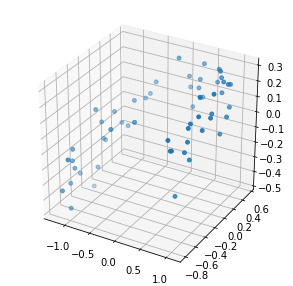

In [20]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')

# scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
# 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
# marker = 점의 형태
# s = 점의 크기
# c = 점의 색깔
ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2], marker='o', s=15)

plt.show()

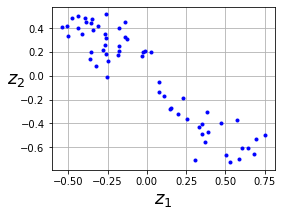

In [19]:
codings = encoder.predict(X_train)

fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# StackedAutoEncoder_Fastion_MNIST

In [21]:
(X, y), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X = X.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

X_train, X_valid = X[:-5000], X[-5000:]
y_train, y_valid = y[:-5000], y[-5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [24]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu'),
])

stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape=[30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28]),
])

stacked_autoencoder = keras.models.Sequential([
    stacked_encoder,
    stacked_decoder
])

#binary_crossentropy 손실을 사용함. 재구성 작업을 다중 레이블 이진 분류로 다룬다.
stacked_autoencoder.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [26]:
history = stacked_autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3373 - val_loss: 0.3189
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3059 - val_loss: 0.3031
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2991 - val_loss: 0.2992
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2952 - val_loss: 0.2945
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2925 - val_loss: 0.2930
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2907 - val_loss: 0.2915
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2893 - val_loss: 0.2902
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2883 - val_loss: 0.2966
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2874 - val_loss: 0.2895
Epoch 10/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.286

#Fashion_MNIST_Visualization

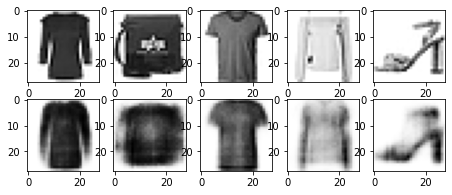

In [29]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")

show_reconstructions(stacked_autoencoder)